In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)
#-------------------------------------------------------------------------------------------------------------------------------
K = len(np.unique(y_train)) # Classes(Finds the unique labels in y_train)
Ntr = x_train.shape[0] # no. of training examples
Nte = x_test.shape[0] # no. of test examples
Din = 3072 # CIFAR10 32*32*3 the total intensity values in the RGB image

## here we do not use mean normalization
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) #takes the pixel wise mean for all the images
x_train = x_train - mean_image
x_test = x_test - mean_image

'''there are 10 classes in CIFARI-10 and the Y gives values form 0-9,
these are converted to a bonary matrix i such a way that the index of the matrix will represent one(1) eg. [0,0,0,0,0,0,1,0,0,0] for y = 6'''
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#each row gives the image pixels(Here we vectorise the given image data)
x_train = np.reshape(x_train,(Ntr,Din)) 
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [4]:
#defining the functions
def sigmoid(x, w1, b1):
    sgm = 1/(1.0 + np.exp(-x.dot(w1) - b1))
    return sgm

def calc_accuracy(y_predicted, y_check):
    y_predicted = np.argmax(y_predicted, axis = 1)#finds the maximum value index in each row(prediction)
    y_check = np.argmax(y_check, axis = 1)
    accuracy = np.sum(y_predicted == y_check)/len(y_check)
    return accuracy*100

In [5]:
H = 200
std = 5e-6
#giving random weight to both w1 and w2 initially
w1 = std*np.random.randn(Din, H) #Hidden layer weights
w2 = std*np.random.randn(H, K) #last layer weights
b1 = np.zeros(H) #hidden layer bias
b2 = np.zeros(K) #last layer bias
print("w1:", w1.shape)
print("w2:", w2.shape)
print("b1:", b1.shape)
print("b2:", b2.shape)

batch_size = 500
batch_count = int(Ntr/batch_size)
iterations = 100 #epochs
lr = 1.4e-2
lr_decay = 0.999
reg = 5e-6 #regularization coefficient
lr_history = []
loss_history = []
train_acc_history = [] #training accuracy
val_acc_history = [] #validation accuracy history

seed = 0
rng = np.random.default_rng(seed=seed)

#lets use 50 epochs for the mini batch gradient descent
for t in range(1,iterations+1):
    for i in range(0, Ntr, batch_size):#jumping fromm batch_size to batch_size
        batch_indices = np.arange(i,i+batch_size)#array of indices relevant to the batch
        rng.shuffle(batch_indices) #shuffling the batch indices 
        x = x_train[batch_indices]
        y = y_train[batch_indices]
        h = sigmoid(x,w1,b1)
        y_pred = h.dot(w2) + b2
        loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w2*w2) + np.sum(w1*w1))
                                #----------------------------------------------------------------------
        #calculations and appending
        loss_history.append(loss)

        #training accuracy
        train_accuracy = calc_accuracy(y_pred, y)
        train_acc_history.append(train_accuracy)

        #calculating rhe validation accuracy
        # these values are appended for each mini batch
        h_test = sigmoid(x_test,w1,b1)
        y_pred_test = h_test.dot(w2) + b2
        validation_accuracy = calc_accuracy(y_pred_test, y_test)
        val_acc_history.append(validation_accuracy)

        lr_history.append(lr)
    #----------------------------------------------------------------------
        dy_pred = 1./batch_size*2.0*(y_pred - y) #this is the partial derivative of loss w.r.t dy_pred
        dw2 = h.T.dot(dy_pred) + reg*w2
        db2 = dy_pred.sum(axis = 0)
        dh = dy_pred.dot(w2.T)
        dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
        db1 = (dh*h*(1-h)).sum(axis = 0)
        w1 = w1 -  lr*dw1
        w2 = w2 - lr*dw2
        b1 = b1 - lr*db1
        b2 = b2 - lr*db2
        lr = lr*lr_decay
    #this print the loss, train ans validation accuracies after every iteration (for a set of batches)
    if (t == 1 or t%10 == 0):
        # print('Iteration: %d / %d , loss: %f'%(t,iterations,loss))
        print('Iteration: %d/%d , Loss: %f , Training_accuracy: %f , Validation_accuracy: %f , Lr: %f'%(t, iterations, loss, train_accuracy, validation_accuracy, lr))


print("Training Done!!")
print("Loss: ", loss) #final loss
print("Training_accuracy: ",train_accuracy) #final training accuracy
print("Test_accuracy: ", validation_accuracy) #final test accuracy
print('Learning Rate:', lr)
#------------------------------------
#calculating the testing loss
test_loss = (1./Nte)*(np.square(y_pred_test - y_test)).sum()
print('Testing Loss: ', test_loss)
#------------------------------------



w1: (3072, 200)
w2: (200, 10)
b1: (200,)
b2: (10,)
Iteration: 1/100 , Loss: 0.788988 , Training_accuracy: 40.200000 , Validation_accuracy: 37.870000 , Lr: 0.012667
Iteration: 10/100 , Loss: 0.689478 , Training_accuracy: 50.400000 , Validation_accuracy: 45.090000 , Lr: 0.005148
Iteration: 20/100 , Loss: 0.638396 , Training_accuracy: 56.000000 , Validation_accuracy: 46.100000 , Lr: 0.001893
Iteration: 30/100 , Loss: 0.616576 , Training_accuracy: 59.200000 , Validation_accuracy: 46.740000 , Lr: 0.000696
Iteration: 40/100 , Loss: 0.608529 , Training_accuracy: 61.000000 , Validation_accuracy: 46.600000 , Lr: 0.000256
Iteration: 50/100 , Loss: 0.605778 , Training_accuracy: 62.000000 , Validation_accuracy: 46.560000 , Lr: 0.000094
Iteration: 60/100 , Loss: 0.604686 , Training_accuracy: 62.200000 , Validation_accuracy: 46.390000 , Lr: 0.000035
Iteration: 70/100 , Loss: 0.604178 , Training_accuracy: 62.400000 , Validation_accuracy: 46.420000 , Lr: 0.000013
Iteration: 80/100 , Loss: 0.603970 , T

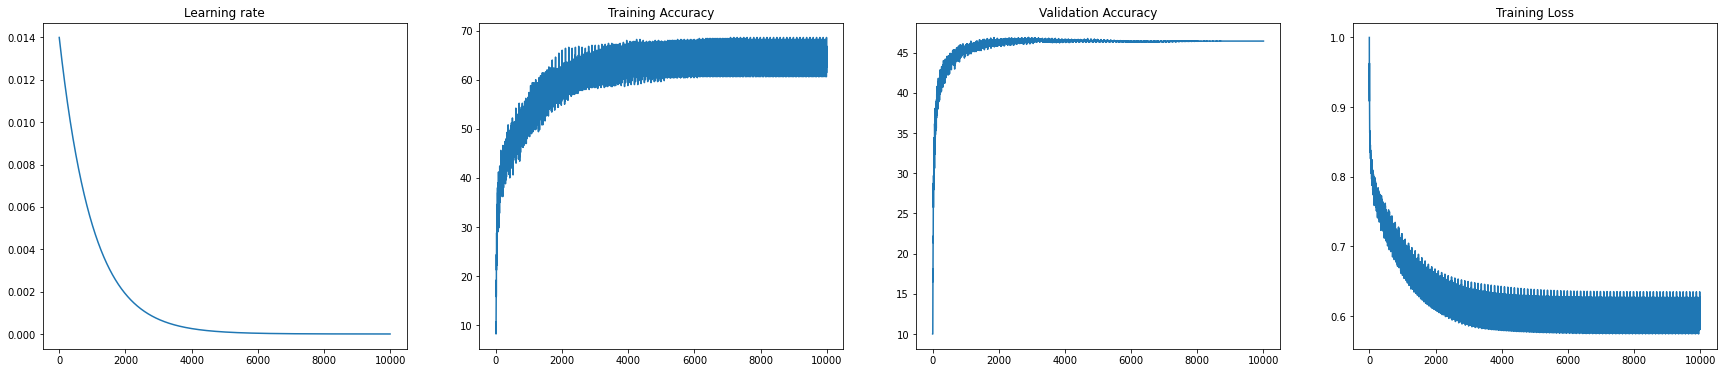

In [7]:
#-----------------------------------------------------------------------------------------------------------------------------
titles = ['Learning rate' ,'Training Accuracy', 'Validation Accuracy', 'Training Loss']
curves = [lr_history, train_acc_history, val_acc_history, loss_history]
plt.figure(figsize = (30,6))
for i in range(4):
    plt.subplot(1, 4, i+1)# here we use subplot not subplots. directly addressing the subplot
    plt.plot(curves[i])#imshow(images[i])
    plt.title(titles[i])
    #plt.savefig('Figures/5.curves.png')
plt.show()
#-----------------------------------------------------------------------------------------------------------------------------